In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv('../data/train_data_modified.csv')
train_data.head()

,CategoryCode,ItemCode,Week,id,WeeklySales
0,category_2,174436,w1,1,35
1,category_2,118033,w1,1,7
2,category_2,20824,w1,1,53
3,category_1,1061341,w1,1,18
4,category_1,76399,w1,1,21


In [3]:
train_data['ItemCode'].value_counts()

174436     20
1081078    20
371239     20
1071124    20
1056463    20
           ..
23200      15
1090249    15
1101769    15
267496     15
1077118    13
Name: ItemCode, Length: 194, dtype: int64

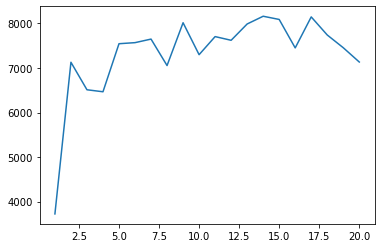

In [4]:
X = train_data.groupby(['id']).agg({'WeeklySales':'sum'})
X.reset_index(inplace = True)
plt.plot(X['id'], X['WeeklySales'])

<Figure size 1080x72 with 0 Axes>

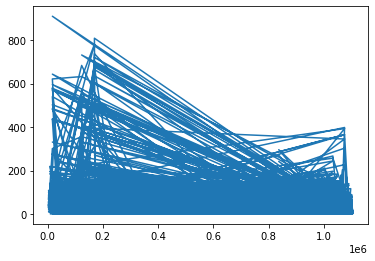

<Figure size 1080x72 with 0 Axes>

In [5]:
plt.plot(train_data['ItemCode'], train_data['WeeklySales'])
plt.figure(figsize=(15,1))

(array([46., 23.,  6.,  7.,  0.,  0.,  5., 12.,  5., 90.]),
 array([   3418. ,  113578.9,  223739.8,  333900.7,  444061.6,  554222.5,
         664383.4,  774544.3,  884705.2,  994866.1, 1105027. ]),
 <BarContainer object of 10 artists>)

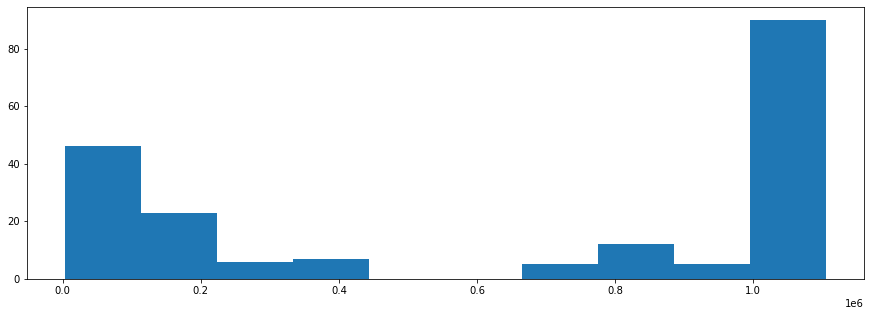

In [6]:
X = train_data.groupby(['ItemCode']).agg({'WeeklySales':'sum'})
X.reset_index(inplace = True)
plt.figure(figsize=(15, 5))
plt.hist(X['ItemCode'])


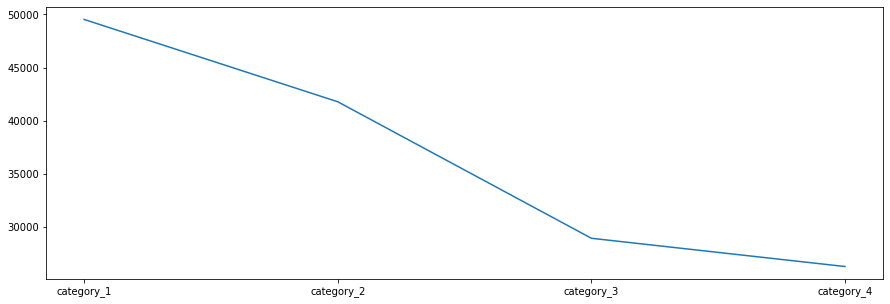

In [7]:
X = train_data.groupby(['CategoryCode']).agg({'WeeklySales':'sum'})
X.reset_index(inplace = True)
plt.figure(figsize=(15, 5))
plt.plot(X['CategoryCode'],X['WeeklySales'])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


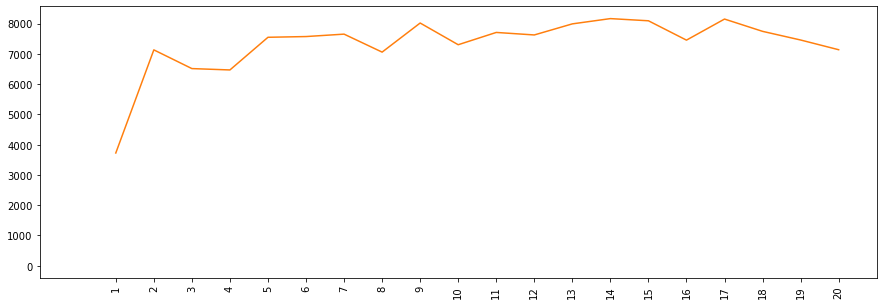

In [10]:
X = train_data.groupby(['id']).agg({'WeeklySales':'sum'})
X.reset_index(inplace = True)
Xi = list((X['id']))
print(Xi)
plt.figure(figsize=(15, 5))
plt.xticks(Xi,X['id'],rotation = 90)
plt.plot(0,0)
plt.plot(Xi,X['WeeklySales'])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


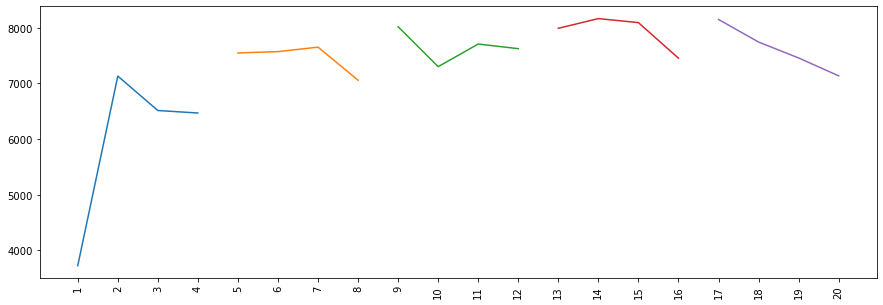

In [12]:
X = train_data.groupby(['id']).agg({'WeeklySales':'sum'})
X.reset_index(inplace = True)
Xi = list((X['id']))
print(Xi)
plt.figure(figsize=(15, 5))
plt.xticks(Xi,X['id'],rotation = 90)
le=0
he=4
for i in range (0,5):
    plt.plot(Xi[le:he],X['WeeklySales'][le:he])
    le=he
    he=le+4

<AxesSubplot:>

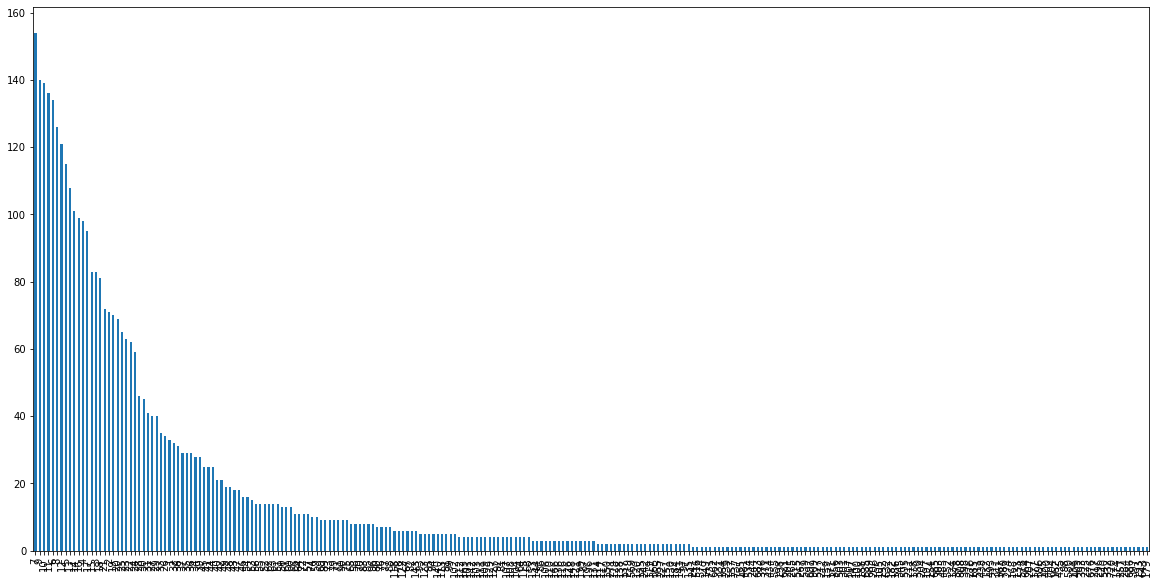

In [20]:
plt.figure(figsize=(20, 10))
train_data['WeeklySales'].value_counts().plot.bar()

In [ ]:
train_data_1 = pd.read_csv('../data/train_data.csv')
train_data_1.head()

In [ ]:
X_1 = train_data_1.groupby(['DateID']).agg({'DailySales':'sum'})
X_1.reset_index(inplace = True)
plt.figure(figsize=(20, 10))
plt.xticks(rotation = 90)
plt.plot(X_1['DateID'],X_1['DailySales'])

1. Univariate for Sales 
2. Sales vs week
3. Sales vs category 
4. Sales vs item
### Scatter Plot
5. Sales vs Last week sales
6. Sales vs Last 2 week 
7. Sales vs Last 3 week
8. Sales vs Last diff

### Univariate for Sales

(array([3.461e+03, 2.110e+02, 3.500e+01, 1.200e+01, 1.400e+01, 1.200e+01,
        1.200e+01, 1.000e+01, 4.000e+00, 1.000e+00]),
 array([  1. ,  91.8, 182.6, 273.4, 364.2, 455. , 545.8, 636.6, 727.4,
        818.2, 909. ]),
 <BarContainer object of 10 artists>)

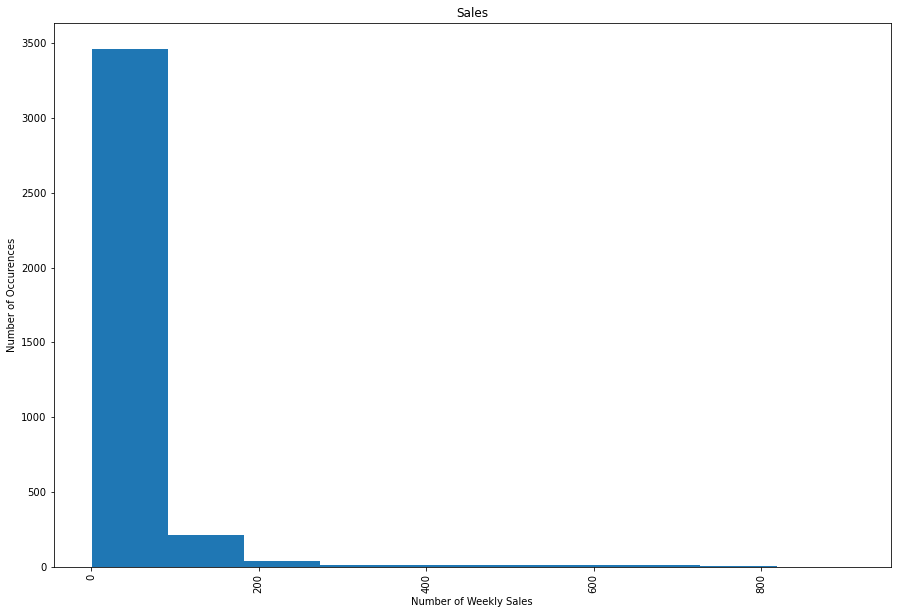

In [46]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation = 90)
plt.title("Sales")
plt.xlabel("Number of Weekly Sales")
plt.ylabel("Number of Occurences")
plt.hist(train_data['WeeklySales'])

### Sales vs Week

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


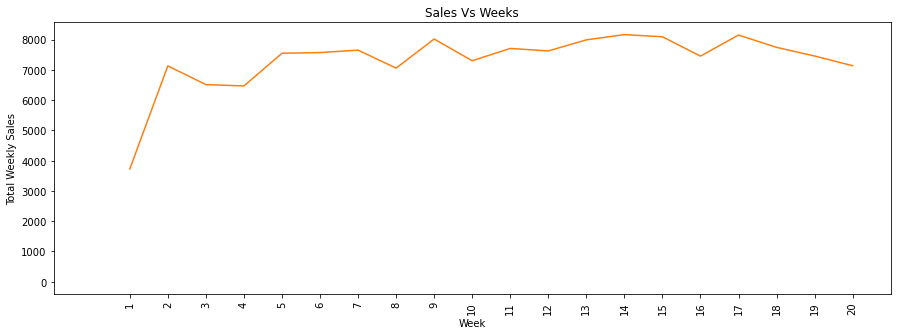

In [43]:
X = train_data.groupby(['id']).agg({'WeeklySales':'sum'})
X.reset_index(inplace = True)
Xi = list((X['id']))
print(Xi)
plt.figure(figsize=(15, 5))
plt.xticks(Xi,X['id'],rotation = 90)
plt.title("Sales vs Weeks")
plt.xlabel("Week")
plt.ylabel("Total Weekly Sales")
plt.plot(0,0)
plt.plot(Xi,X['WeeklySales'])

### Sales vs Category

<BarContainer object of 4 artists>

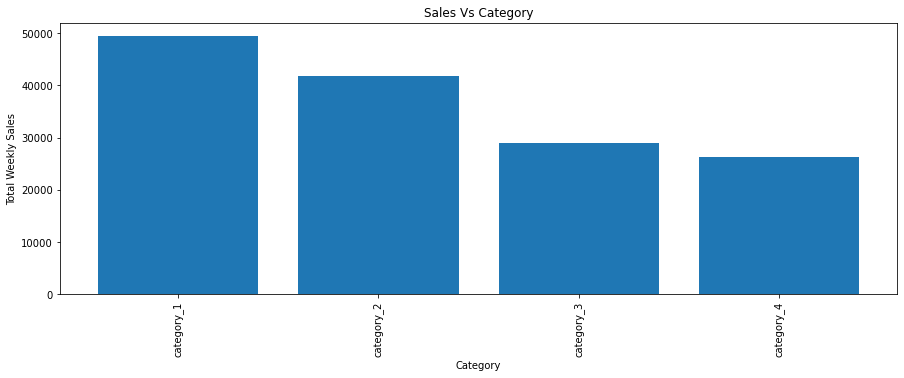

In [50]:
X = train_data.groupby(['CategoryCode']).agg({'WeeklySales':'sum'})
X.reset_index(inplace = True)
plt.figure(figsize=(15, 5))
plt.xticks(rotation = 90)
plt.title("Sales vs Category")
plt.xlabel("Category")
plt.ylabel("Total Weekly Sales")
plt.bar(X['CategoryCode'],X['WeeklySales'])

### Sales Vs Item

<AxesSubplot:title={'center':'Sales vs Item'}, xlabel='ItemCode', ylabel='WeeklySales'>

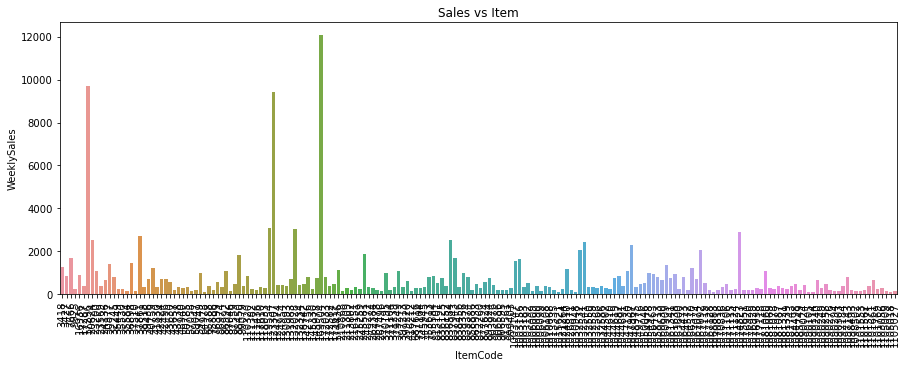

In [66]:
X = train_data.groupby(['ItemCode']).agg({'WeeklySales':'sum'})
X.reset_index(inplace = True)
plt.figure(figsize=(15, 5))
plt.xticks(rotation = 90)
plt.title("Sales vs Item")
plt.xlabel("Item")
plt.ylabel("Total Weekly Sales")
#plt.bar(X['ItemCode'],X['WeeklySales'])
import seaborn as sns
sns.barplot(x='ItemCode', y = 'WeeklySales', data = X)

In [62]:
Average_Sales = train_data.groupby(['ItemCode'])['WeeklySales'].mean().to_frame('AverageSales').reset_index()
train_data = pd.merge(train_data, Average_Sales, on = 'ItemCode')
train_data['Last_Week_Sales'] = train_data.groupby(['ItemCode'])['WeeklySales'].shift()
train_data['Last_Week_Diff'] = train_data.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - train_data.groupby(['ItemCode'])['WeeklySales'].shift(periods=2)
train_data['Last_2_Week_Sales'] = train_data.groupby(['ItemCode'])['WeeklySales'].shift(2)+train_data.groupby(['ItemCode'])['WeeklySales'].shift()
train_data['Last_2_Week_Diff'] = train_data.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - train_data.groupby(['ItemCode'])['WeeklySales'].shift(periods=3)
train_data['Last_3_Week_Sales'] = train_data.groupby(['ItemCode'])['WeeklySales'].shift(3)+train_data.groupby(['ItemCode'])['WeeklySales'].shift(2)+train_data.groupby(['ItemCode'])['WeeklySales'].shift()
train_data['Last_3_Week_Diff'] = train_data.groupby(['ItemCode'])['WeeklySales'].shift(periods=1) - train_data.groupby(['ItemCode'])['WeeklySales'].shift(periods=4)

### Sales Vs Last week sales

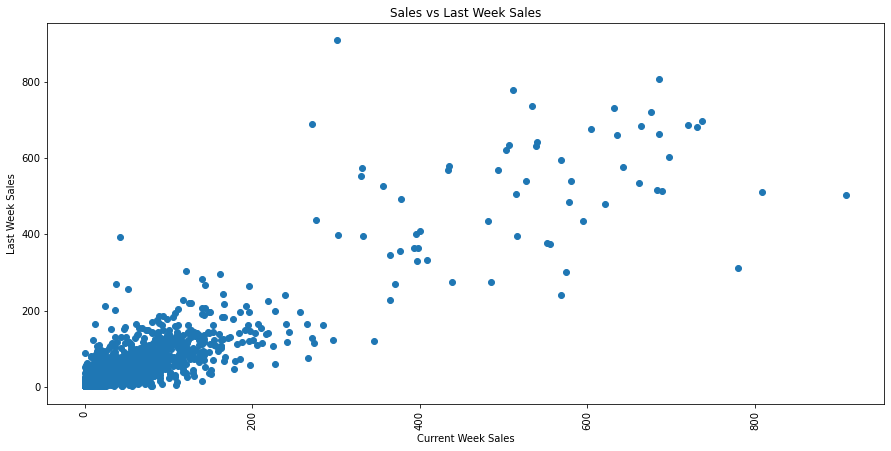

In [60]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 90)
plt.title("Sales vs Last Week Sales")
plt.ylabel("Last Week Sales")
plt.xlabel("Current Week Sales")
plt.scatter(train_data['WeeklySales'],train_data['Last_Week_Sales'])

### Sales Vs Last 2 weeks sales

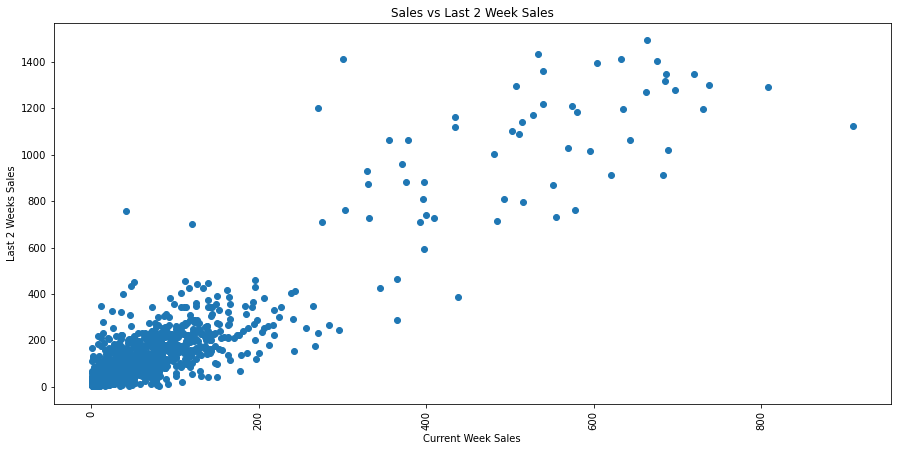

In [63]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 90)
plt.title("Sales vs Last 2 Week Sales")
plt.ylabel("Last 2 Weeks Sales")
plt.xlabel("Current Week Sales")
plt.scatter(train_data['WeeklySales'],train_data['Last_2_Week_Sales'])

### Sales Vs Last 3 weeks sales

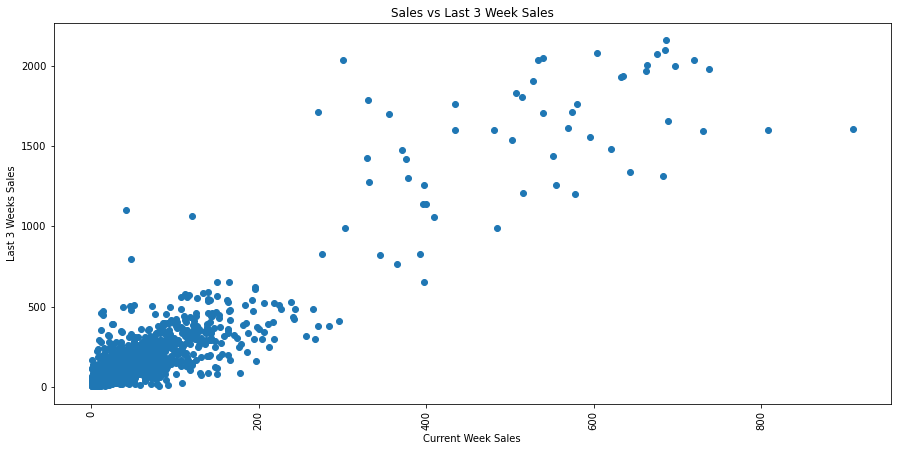

In [64]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 90)
plt.title("Sales vs Last 3 Week Sales")
plt.ylabel("Last 3 Weeks Sales")
plt.xlabel("Current Week Sales")
plt.scatter(train_data['WeeklySales'],train_data['Last_3_Week_Sales'])

### Sales Vs Last Diff

In [ ]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 90)
plt.title("Sales vs Different with Last week's Sales")
plt.ylabel("Different with Last week's Sales")
plt.xlabel("Current Week Sales")
plt.scatter(train_data['WeeklySales'],train_data['Last_3_Week_Sales'])